# 비타민 14주 차 복습 문제
## 딥러닝 2주 차 - 5기 4조

### MNIST 손 글씨 분류하기
#### *데이터 불러오기*

In [42]:
import numpy as np
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#불러올 때 부터 train/test 데이터 셋과 feature/label을 따로 지정
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
#3D-Tensor의 이미지 데이터

(60000, 28, 28)
(10000, 28, 28)
(60000,)


#### *label 값 분포 확인*

In [43]:
unique,counts=np.unique(y_train,return_counts=True)
print('Train labels:',dict(zip(unique,counts)))
unique,counts=np.unique(y_test,return_counts=True)
print('Test labels:',dict(zip(unique,counts)))

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


#### *이미지 표본 시각화*

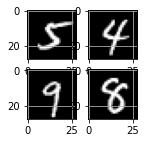

In [44]:
import matplotlib.pyplot as plt
# 4개의 임의 표본 추출하기
indices=np.random.randint(0,x_train.shape[0],size=4)
images=x_train[indices]
labels=y_train[indices]
# 4개 표본 그림그리기
plt.figure(figsize=(2,2))
for i in range(len(indices)):
    plt.subplot(2,2,i+1)
    image=images[i]
    plt.imshow(image, cmap='gray')
    plt.grid('off')
plt.show()

#### *피처 정규화 / 라벨 One-Hot 인코딩*

In [49]:
# one-hot coding을 위한 라이브러리 불러오기
from keras.utils import np_utils
num_features=784  #x_train.shape[1]*x_train.shape[2] a.k.a Flatten
x_train=x_train.reshape(-1,num_features).astype('float32')
x_test=x_test.reshape(-1,num_features).astype('float32')

x_train=x_train/255.
x_test=x_test/255.

# 10개의 범주형 자료를 one-hot 벡터로 바꿔주기
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_classes=y_train.shape[1]
print(y_train.shape)

(60000, 10)


### 문제 1 : 조건에 맞게 코드를 작성해주세요
#### *순차형 API 모델링*
- Dense -> Relu -> Dropout -> Dense -> Relu -> Dense -> Softmax
- 채널 숫자는 아래의 표 참고

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
#2개의 은닉층과 1개의 출력층으로 구성된 MLP모형

model=Sequential()
####################################
#######    fill this space   #######
####################################

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


#### *train / validation split*

In [37]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]
print(partial_x_train.shape)
print(partial_y_train.shape)

(50000, 784)
(50000, 10)


### 문제 2 : 아래의 빈 칸을 채워주세요
#### *모델 compile / fitting*
- 손실 함수 : cross-entropy / 최적화 알고리즘 : adam / 평가 방법 : 정확도
- 에폭 : 10 / 배치 사이즈 : 64

In [11]:
########   fill this line   ######## 
history=model.fit(#### fill this blank ####)
history_out=history.history
history_out.keys()

Epoch 1/10
782/782 [==============================] - 10s 13ms/step - loss: 0.3387 - accuracy: 0.8976 - val_loss: 0.1521 - val_accuracy: 0.9548
Epoch 2/10
782/782 [==============================] - 9s 12ms/step - loss: 0.1631 - accuracy: 0.9497 - val_loss: 0.1119 - val_accuracy: 0.9675- loss:
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1300 - accuracy: 0.9590 - val_loss: 0.0956 - val_accuracy: 0.9699
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1114 - accuracy: 0.9650 - val_loss: 0.0851 - val_accuracy: 0.9743
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1021 - accuracy: 0.9683 - val_loss: 0.0770 - val_accuracy: 0.9775
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0883 - accuracy: 0.9712 - val_loss: 0.0788 - val_accuracy: 0.9772
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0854 - accuracy: 0.9724 - val_loss: 0.0754 - val_accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### *Loss 시각화*

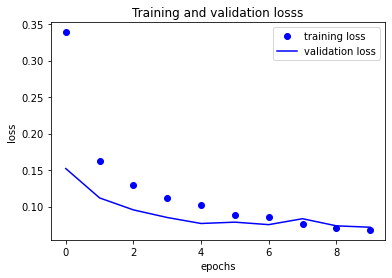

In [39]:
import matplotlib.pyplot as plt

loss=history_out['loss']
loss_val=history_out['val_loss']
accuracy=history_out['accuracy']
accuracy_val=history_out['val_accuracy']
plt.plot(loss,'bo',label='training loss')
plt.plot( loss_val,'b', label='validation loss' )
plt.title('Training and validation losss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#### *정확도 시각화*

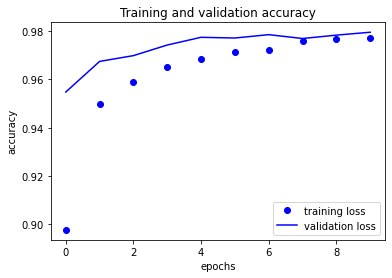

In [40]:
plt.clf()
plt.plot(accuracy,'bo',label='training loss')
plt.plot(accuracy_val,'b', label='validation loss' )
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### *test 셋 예측 / 평가*

In [ ]:
import pandas as pd
#loss,accuracy 평가
result_train=model.evaluate(x_train,y_train)
result_test=model.evaluate(x_test,y_test)
print(result_train)
print(result_test)

#predict method
pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred.head()

10000/10000 [==============================] - 0s 25us/step
[0.0016932068984431984, 0.9996166666666667]
[0.07724655894196203, 0.9853]


,0,1,2,3,4,5,6,7,8,9
0,6.194058e-20,1.543851e-16,5.002994e-12,5.879471e-12,1.921653e-17,2.172387e-20,8.632302e-35,1.000000e+00,1.505898e-15,1.402312e-10
1,1.773110e-15,1.343046e-16,1.000000e+00,2.149296e-15,3.389081e-21,1.079731e-18,7.891478e-17,2.729345e-17,1.753549e-15,1.040158e-20
2,1.003085e-12,9.999998e-01,1.764042e-07,2.180762e-11,4.792377e-10,6.744931e-13,8.021288e-09,8.970715e-08,1.060192e-08,1.556031e-15
3,1.000000e+00,2.679071e-22,8.096132e-12,6.897116e-14,3.153140e-16,2.451457e-12,1.956611e-10,2.660714e-17,2.974304e-18,1.921593e-11
4,1.328908e-09,3.842744e-12,2.796849e-11,8.706871e-13,9.999994e-01,4.950115e-14,9.592601e-10,4.728687e-07,6.603913e-11,1.569124e-07


### 문제 3 : 조건에 맞게 코드를 작성해주세요
#### *함수형 API 모델링*
- Layer 구성 및 채널 숫자는 위와 동일

In [46]:
import numpy as np
from keras.layers import Dense, Dropout, Input
from keras.models import Model
x=Input(shape=(num_features,))
####################################
#######    fill this space   #######
####################################
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


### 문제 2와 동일 : 아래의 빈 칸을 채워주세요
#### *모델 compile / fitting*
- 손실 함수 : cross-entropy / 최적화 알고리즘 : adam / 평가 방법 : 정확도
- 에폭 : 10 / 배치 사이즈 : 64

In [50]:
########   fill this line   ######## 
model.fit(#### fill this blank ####)

Epoch 1/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3096 - acc: 0.9061
Epoch 2/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1538 - acc: 0.9532
Epoch 3/10
938/938 [==============================] - 8s 8ms/step - loss: 0.1229 - acc: 0.9618
Epoch 4/10
938/938 [==============================] - 9s 9ms/step - loss: 0.1074 - acc: 0.9656A: 1s - los
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0969 - acc: 0.9692
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0843 - acc: 0.9730
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0780 - acc: 0.9743
Epoch 8/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0726 - acc: 0.9769
Epoch 9/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0664 - acc: 0.9789
Epoch 10/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0635 - acc: 0.9790


### 미니 배치 GD 클래스 구현하기
#### *데이터 불러오기*

In [4]:
#PT의 예제 코드
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
x=diabetes.data[:,2]
y=diabetes.target
print('shape of x :',x.shape)
print('shape of y :',y.shape)

shape of x : (442,)
shape of y : (442,)


### 문제 4 : 아래의 빈 칸을 채워주세요
#### *클래스 구현*
- 미니 배치 사이즈 별 모수 최신화
- loss : MSE

In [38]:
class MiniBatch:
    def __init__(self):
        self.w=np.array([[1.0]])
        self.b=np.array([[1.0]])
        
    def forpass(self,x):
        ######## fill this space ########
        return y_hat
    
    def backprop(self,x,err):
        ######## fill this space ########
        return w_grad, b_grad
    
    def fit(self,x,y,batch_size=32,lr=0.001,epochs=100):
        x=x.reshape(-1,1)
        y=y.reshape(-1,1)
        for i in range(epochs):
            indexes=np.random.permutation(np.arange(len(x)))
            x=x[indexes]
            y=y[indexes]
            bins=len(x)//batch_size
            if len(x)%batch_size:
                bins+=1
            for i in range(bins):
                x_batch=######## fill this space ########
                y_batch=######## fill this space ########
                y_hat=######## fill this space ########
                err=(y_batch-y_hat)/batch_size
                w_grad,b_grad=######## fill this space ########
                self.w+=lr*w_grad
                self.b+=lr*b_grad

#### *결과 시각화*

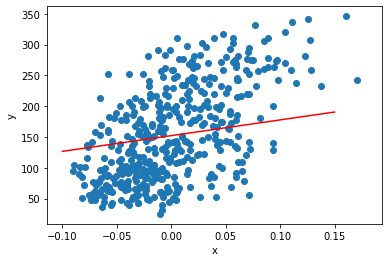

In [36]:
import numpy as np
import matplotlib.pyplot as plt

neuron=MiniBatch()
neuron.fit(x,y,epochs=10000)

plt.scatter(x,y)
pt1=(-0.1,-0.1*neuron.w[0]+neuron.b[0])
pt2=(0.15,0.15*neuron.w[0]+neuron.b[0])
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()